# Police Calls in San Jose in 2021

Each record in this data set represents one incident. Please note, multiple calls received for any incident will be represented only once in this data set.

Imports

In [1]:

import matplotlib.pyplot as plt
import pandas as pd

Import data

In [2]:
data = pd.read_csv('policecalls2021.csv')

In [3]:
print(data.shape)
print(data.columns)
print(len(set(data.CALL_TYPE)))
print(len(set(data.FINAL_DISPO)))
print("Number or priority ranks: " + str(len(set(data.PRIORITY))))

(1375897, 16)
Index(['CDTS', 'EID', 'START_DATE', 'CALL_NUMBER', 'PRIORITY', 'REPORT_DATE',
       'OFFENSE_DATE', 'OFFENSE_TIME', 'CALLTYPE_CODE', 'CALL_TYPE',
       'FINAL_DISPO_CODE', 'FINAL_DISPO', 'COMMON_PLACE_NAME', 'ADDRESS',
       'CITY', 'STATE'],
      dtype='object')
218
25
Number or priority ranks: 6


In [4]:
# CLEANING UP FINAL_DISPO
set(data.FINAL_DISPO)
# noticed concatinated values, switching all to the full length
data.FINAL_DISPO = data.FINAL_DISPO.replace(['Courtesy Service/Citizen or ag',
    'Field Interview (F.I.) Complet',
    'Gone on Arrival/unable to loca',
    'No report required; dispatch r',
    'Prior case, follow-up activity',
    'Traffic Citation Issued, Hazar',
    'Traffic Citation Issued, Non-H'
    ],
    ['Courtesy Service/Citizen or agency assist',
    'Field Interview (F.I.) Completed',
    'Gone on Arrival/unable to locate',
    'No report required; dispatch record only',
    'Prior case, follow-up activity only',
    'Traffic Citation Issued, Hazardous Violation',
    'Traffic Citation Issued, Non-Hazardous Violation'
    ])
set(data.FINAL_DISPO)

{'Arrest Made',
 'Arrest by Warrant',
 'Canceled',
 'Courtesy Service/Citizen or agency assist',
 'Criminal Citation',
 'Field Interview (F.I.) Completed',
 'Gone on Arrival/unable to locate',
 'No Disposition',
 'No Response',
 'No report required; dispatch record only',
 'Prior case, follow-up activity only',
 'Report taken',
 'Stranded motorist assist',
 'Supplemental report taken',
 'Traffic Citation Issued, Hazardous Violation',
 'Traffic Citation Issued, Non-Hazardous Violation',
 'Turned over To (TOT)',
 'Unfounded event'}

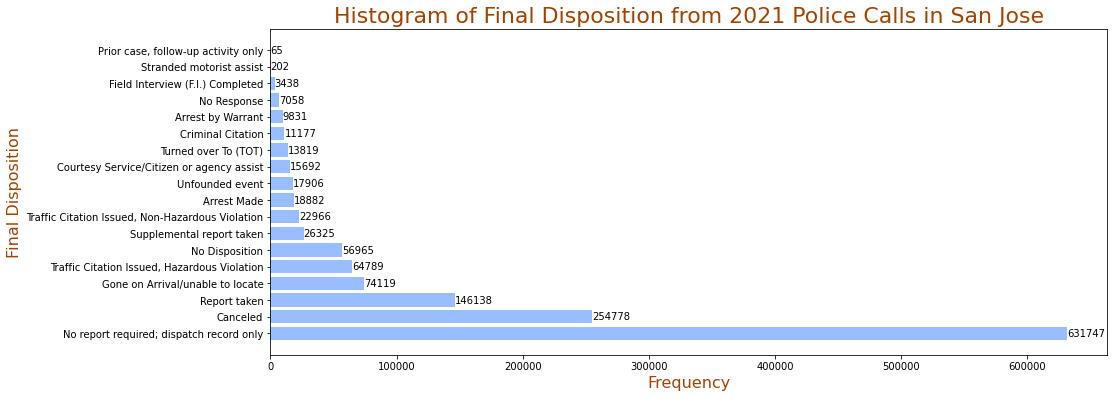

In [67]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

bars = ax.barh(width=data.FINAL_DISPO.value_counts(),y=data.FINAL_DISPO.value_counts().index,color='#99BEFF')
ax.bar_label(bars)
ax.set_title("Histogram of Final Disposition from 2021 Police Calls in San Jose",fontsize=22, color='#A44200')
ax.set_xlabel("Frequency",fontsize=16, color='#A44200')
ax.set_ylabel("Final Disposition",fontsize=16, color='#A44200')
plt.show()

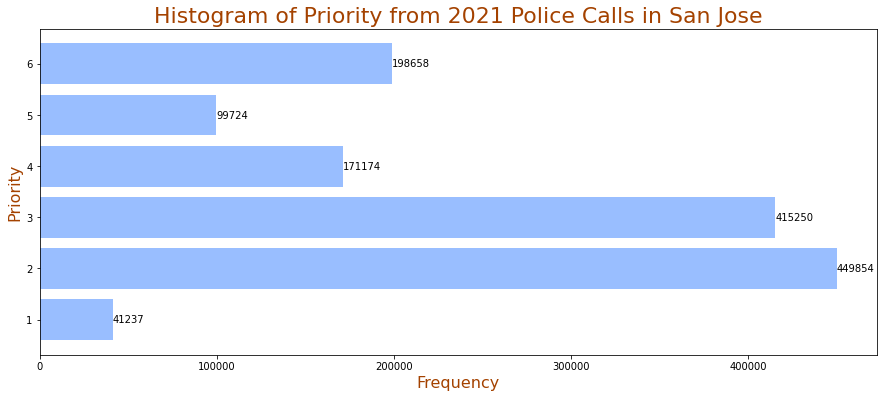

In [68]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

bars = ax.barh(width=data.PRIORITY.value_counts(),y=data.PRIORITY.value_counts().index,color='#99BEFF')
ax.bar_label(bars)
ax.set_title("Histogram of Priority from 2021 Police Calls in San Jose",fontsize=22, color='#A44200')
ax.set_xlabel("Frequency",fontsize=16, color='#A44200')
ax.set_ylabel("Priority",fontsize=16, color='#A44200')
plt.show()

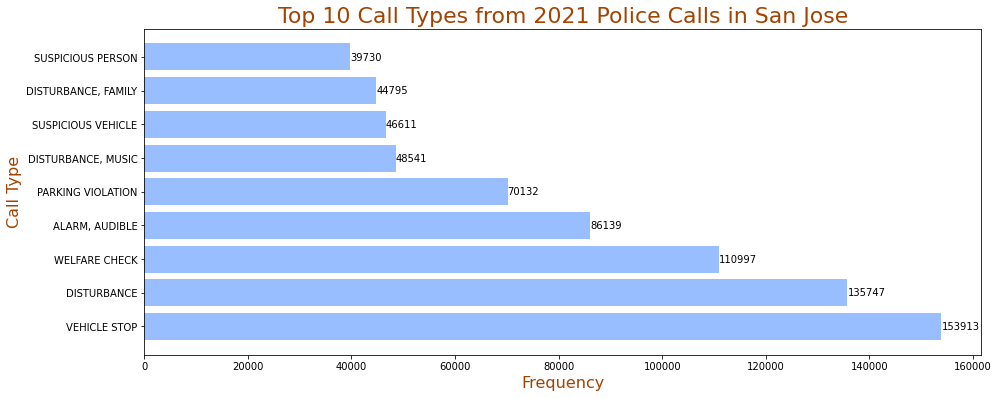

In [80]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

bars = ax.barh(width=data.CALL_TYPE.value_counts()[0:9],y=data.CALL_TYPE.value_counts()[0:9].index,color='#99BEFF')
ax.bar_label(bars)
ax.set_title("Top 10 Call Types from 2021 Police Calls in San Jose",fontsize=22, color='#A44200')
ax.set_xlabel("Frequency",fontsize=16, color='#A44200')
ax.set_ylabel("Call Type",fontsize=16, color='#A44200')
plt.show()

In [8]:
data.loc[data.PRIORITY==1]['CALL_NUMBER']

63         P210010074
67         P210010079
80         P210010091
88         P210010100
111        P210010127
              ...    
1375695    P213640904
1375718    P213650136
1375722    P213650155
1375796    P213630438
1375883    P213610351
Name: CALL_NUMBER, Length: 41237, dtype: object

In [9]:
len(set(data.COMMON_PLACE_NAME))

3824

### Call Types by Priority

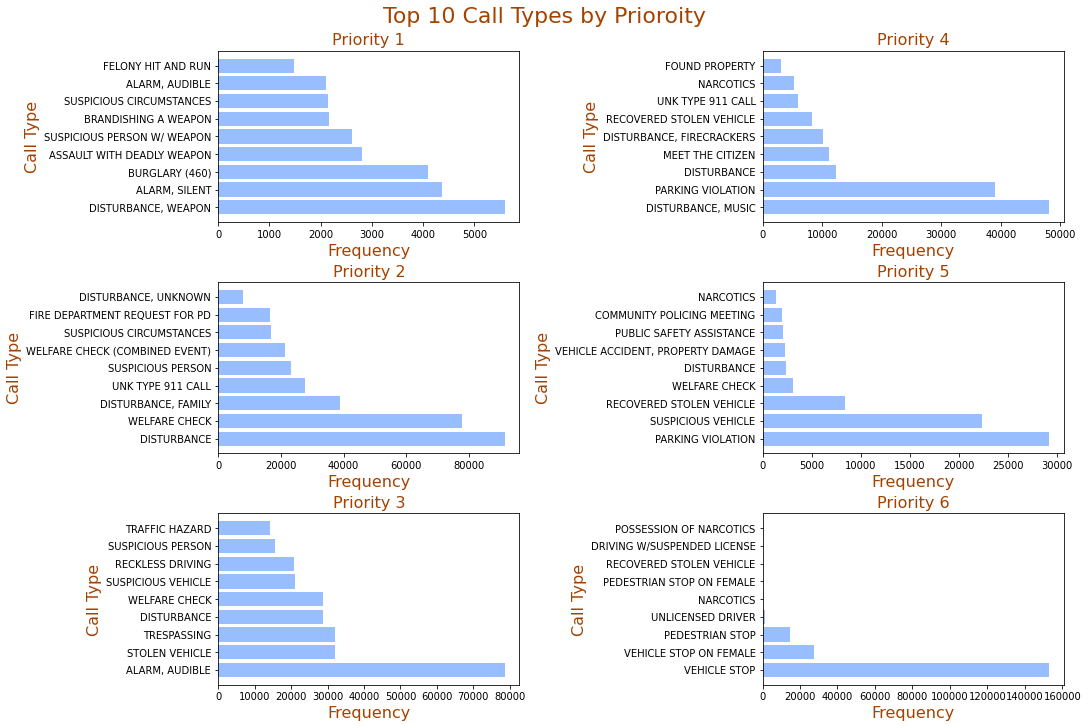

In [33]:
# priority 1

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(3,2,constrained_layout=True)

k = 0
for i in range(6):
    if i>2:
        k=1
    bars = axs[i%3,k].barh(width=data.loc[data.PRIORITY==(i+1)]['CALL_TYPE'].value_counts()[0:9],y=data.loc[data.PRIORITY==(i+1)]['CALL_TYPE'].value_counts()[0:9].index,color='#99BEFF')
    axs[i%3,k].set_title(str("Priority "+str(i+1)),fontsize=16, color='#A44200')
    if i==2:
        axs[i%3,k].set_xlabel("Frequency",fontsize=14, color='#A44200')
    if k == 0:
        axs[i%3,k].set_ylabel("Call Type",fontsize=14, color='#A44200')
fig.suptitle("Top 10 Call Types by Prioroity",fontsize=22, color='#A44200')
plt.show()

In [32]:
str("Priority "+str(2+1))

'Priority 3'